In [1]:
import numpy as np
from matplotlib import pyplot as plt

plt.style.use("ggplot")
%matplotlib inline

In [10]:
n_samples = 200
n_dims = 3
x = np.random.randint(1, 6, n_dims * n_samples).reshape([n_dims, n_samples])

In [11]:
y = (10 + 0.5 * x[0] + 2 * x[1] - x[2])

In [12]:
x = np.insert(x, 0, 1, axis=0) # adding x0 = 1 for theta0

In [13]:
class LinReg(object):
    
    def __init__(self, iterations=1000, learning_rate=0.01):
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.x = None
        self.y = None
        self.w = None
        self.costs = []
        
    def cost(self):
        return np.sum((self.w.T @ self.x - self.y) ** 2)
        
    def fit(self, x, y):
        self.x = x
        self.y = y
        if self.w is None:
            self.w = np.empty((self.x.shape[0], 1))
        for _ in range(self.iterations):
            updated_w = np.ones_like(self.w)
            for i, param in enumerate(self.w):
                updated_w[i] = param - self.learning_rate * 1/self.x.shape[1] * (self.w.T @ self.x - self.y) @ self.x[i, :].T
            self.w = updated_w
            if _ % (self.iterations / 10) == 0:
                self.costs.append(self.cost())
                
    def plot_costs(self):
        plt.plot(self.costs)

In [25]:
mod = LinReg(iterations=5000, learning_rate=0.03)

In [26]:
mod.fit(x, y)

In [29]:
np.round(mod.w, 2)

array([[ 9.99],
       [ 0.5 ],
       [ 2.  ],
       [-1.  ]])

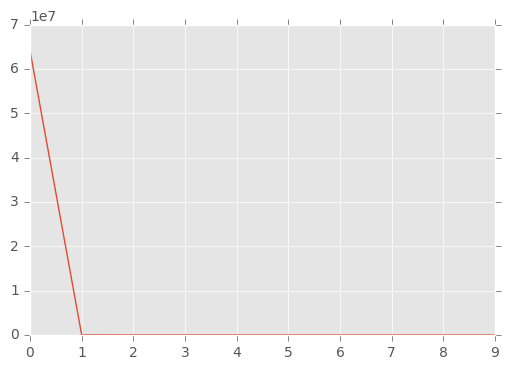

In [28]:
mod.plot_costs()